<a href="https://colab.research.google.com/github/dercodeKoenig/image-upscaling.net_API/blob/main/upscale_api/image_upscaling_api_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# download the demo image
!wget https://image-upscaling.net/assets/images/test_image.jpg

--2025-04-27 15:55:31--  https://image-upscaling.net/assets/images/test_image.jpg
Resolving image-upscaling.net (image-upscaling.net)... 91.216.248.20, 91.216.248.22, 91.216.248.23, ...
Connecting to image-upscaling.net (image-upscaling.net)|91.216.248.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28794 (28K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]  28.12K  --.-KB/s    in 0s      

2025-04-27 15:55:32 (258 MB/s) - ‘test_image.jpg’ saved [28794/28794]



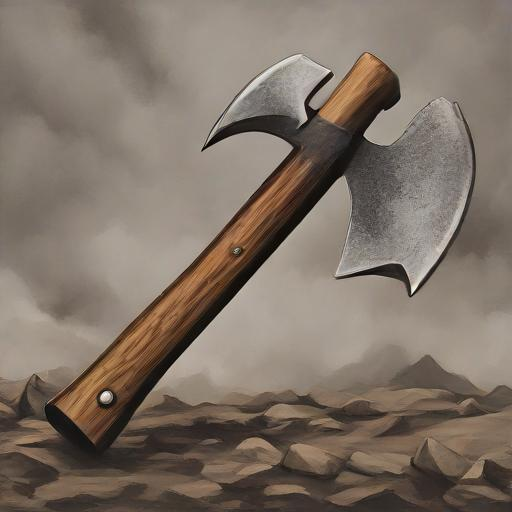

In [3]:
# display the demo image
from IPython.display import Image
Image(filename='test_image.jpg')

In [4]:
# install api
!pip install image-upscaling-api

In [5]:
# generate a random 32 digit hex string
import secrets
def generate_random_hex_string(length):
  return secrets.token_hex(length // 2)

random_hex_string = generate_random_hex_string(32)
random_hex_string

'7e2f133913fc5ad1c183d41bb482b82c'

In [7]:
from image_upscaling_api import upload_image

# Choose your image file and a 32-digit client ID
image_path = "test_image.jpg"
client_id  = random_hex_string
# Upload the image for 4× upscaling, without face enhancement
upload_image(
    image_path,
    client_id,
    scale=4,
    use_face_enhance=False
)

'The file test_image.jpg will be upscaled by 4x. See it in the gallery below!'

In [11]:
# fetch the results every second until everything is processed

from image_upscaling_api import get_uploaded_images
import IPython.display as display
import time

while True:
  display.clear_output(wait=True)
  waiting, completed, in_progress = get_uploaded_images(client_id)
  print("Waiting:", waiting)         # images queued
  print("In Progress:", in_progress) # images being processed
  print("Completed:", completed)     # images done (including a preview image in webp)

  # the completed images return a preview in webp and the full scaled image
  # break the loop when the full scaled image is found in the "completed" list
  image_processed = False
  for url in completed:
    if not "_preview_" in url: # ignore the preview image
      if "test_image" in url: # this was the file name
        image_processed = True
  if image_processed:
    break

  time.sleep(3)


Waiting: []
In Progress: []
Completed: ['https://image-upscaling.net/imageupscaling/images/7e2f133913fc5ad1c183d41bb482b82c/highres/__preview__test_image680e53b26f70c_jpg.jpg.webp', 'https://image-upscaling.net/imageupscaling/images/7e2f133913fc5ad1c183d41bb482b82c/highres/test_image680e53b26f70c_jpg.jpg']


In [12]:
# download the processed image
for url in completed:
    if not "_preview_" in url: # ignore the preview image
      if "test_image" in url: # this was the file name
        !wget $url -O test_image_upscaled.jpg

--2025-04-27 16:02:46--  https://image-upscaling.net/imageupscaling/images/7e2f133913fc5ad1c183d41bb482b82c/highres/test_image680e53b26f70c_jpg.jpg
Resolving image-upscaling.net (image-upscaling.net)... 91.216.248.20, 91.216.248.23, 91.216.248.22, ...
Connecting to image-upscaling.net (image-upscaling.net)|91.216.248.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 686988 (671K) [image/jpeg]
Saving to: ‘test_image_upscaled.jpg’

test_image_upscaled 100%[===================>] 670.89K  1.07MB/s    in 0.6s    

2025-04-27 16:02:48 (1.07 MB/s) - ‘test_image_upscaled.jpg’ saved [686988/686988]



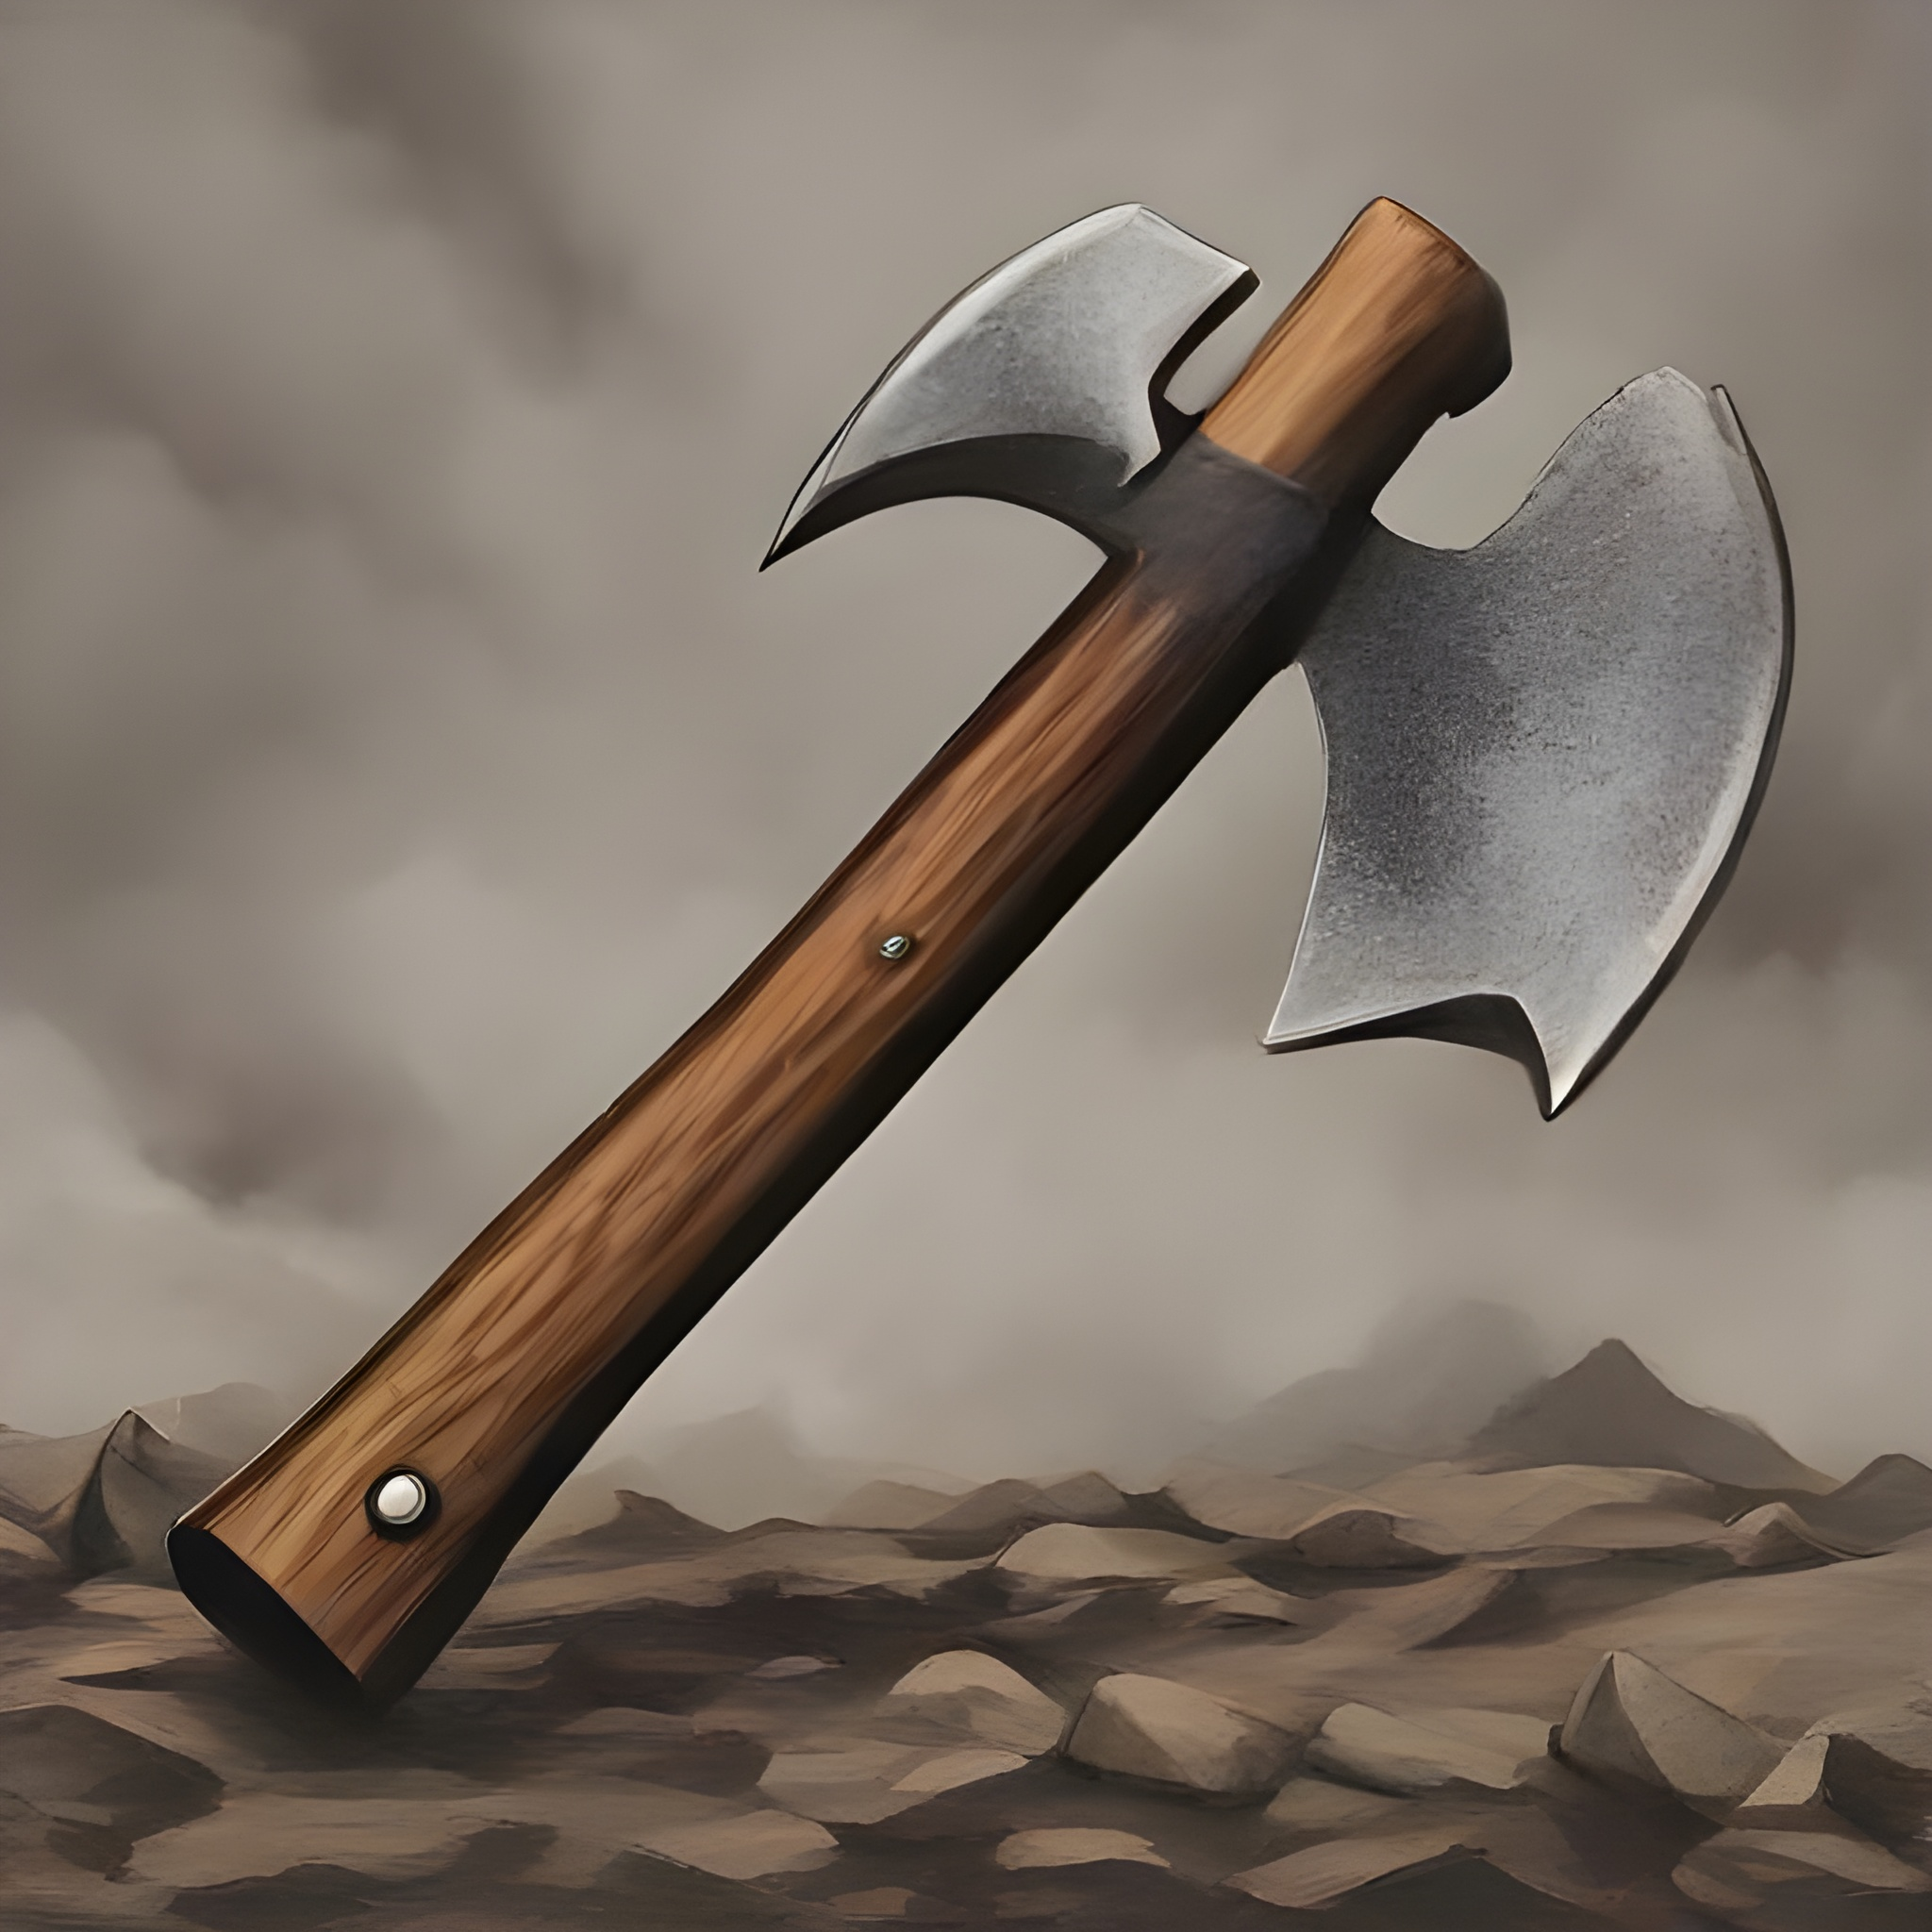

In [13]:
# display the demo image
from IPython.display import Image
Image(filename='test_image_upscaled.jpg')